In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Create a list for holding the cities.
cities = []
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muslyumovo
Processing Record 2 of Set 1 | lakatoro
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | terrace
Processing Record 7 of Set 1 | catamarca
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | bababe
City not found. Skipping...
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 |

Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | bayan
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | abyek
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | saint-michel-des-saints
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 4 | ust-uda
Processing Record 1 of Set 5 | nyagan
Processing Record 2 of Set 5 | chegdomyn
Processing Record 3 of Set 5 | gukovo
Processing Record 4 of Set 5 | muzhi
Processing Record 5 of Set 5 | palana
Processing Record 6 of Set 5 | sulangan
Processing Record 7 of Set 5 | arica
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | zhuanghe
Processing Record 10 of Set 5 | svencionys
Processing Record 11 of Set 5 | saleaula
City not found. Skipping...
Processing Record 12 of Set 5 | bambous virieux
Processing Record 13 of Set 5 | hampton
Processing Record 14 of Set 

Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | zhigansk
Processing Record 32 of Set 8 | lamu
Processing Record 33 of Set 8 | yenagoa
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | campoverde
Processing Record 36 of Set 8 | tomatlan
Processing Record 37 of Set 8 | quimper
Processing Record 38 of Set 8 | yinchuan
Processing Record 39 of Set 8 | dondaicha
Processing Record 40 of Set 8 | mitsamiouli
Processing Record 41 of Set 8 | iracoubo
Processing Record 42 of Set 8 | ambon
Processing Record 43 of Set 8 | port-louis
Processing Record 44 of Set 8 | hervey bay
Processing Record 45 of Set 8 | meulaboh
Processing Record 46 of Set 8 | paris
Processing Record 47 of Set 8 | jibuti
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | kandrian
Processing Record 50 of Set 8 | hamilton
Processing Record 1 of Set 9 | bouna
Processing Record 2 of Set 9 | istok
Processing Record 3 of Set 9 |

Processing Record 19 of Set 12 | boma
Processing Record 20 of Set 12 | lilongwe
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | osypenko
Processing Record 23 of Set 12 | sorvag
City not found. Skipping...
Processing Record 24 of Set 12 | kegayli
City not found. Skipping...
Processing Record 25 of Set 12 | nuzvid
Processing Record 26 of Set 12 | nagorsk
Processing Record 27 of Set 12 | durazno
Processing Record 28 of Set 12 | maceio
Processing Record 29 of Set 12 | jacareacanga
Processing Record 30 of Set 12 | abu samrah
Processing Record 31 of Set 12 | lardos
Processing Record 32 of Set 12 | horodkivka
Processing Record 33 of Set 12 | barrhead
Processing Record 34 of Set 12 | tyukalinsk
Processing Record 35 of Set 12 | hasaki
Processing Record 36 of Set 12 | borovoy
Processing Record 37 of Set 12 | reconquista
Processing Record 38 of Set 12 | goianesia
Processing Record 39 of Set 12 | hofn
Processing Record 40 of Set 12 | shingu
Processing Record 41 of Set 12

In [24]:
len(city_data)

565

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muslyumovo,55.3033,53.1947,-5.58,100,26,2.68,RU,2022-12-21 16:46:58
1,Lakatoro,-16.0999,167.4164,80.67,82,14,8.48,VU,2022-12-21 16:46:58
2,Jamestown,42.0970,-79.2353,34.02,66,100,3.44,US,2022-12-21 16:42:14
3,Port Alfred,-33.5906,26.8910,70.18,75,56,5.99,ZA,2022-12-21 16:46:59
4,Puerto Ayora,-0.7393,-90.3518,80.56,90,34,4.00,EC,2022-12-21 16:46:59
5,Terrace,54.5163,-128.6035,-4.09,49,0,24.16,CA,2022-12-21 16:44:49
6,Catamarca,-28.4696,-65.7852,94.77,30,8,8.01,AR,2022-12-21 16:47:00
7,Te Anau,-45.4167,167.7167,48.88,95,35,1.57,NZ,2022-12-21 16:47:00
8,Rikitea,-23.1203,-134.9692,76.57,83,100,15.55,PF,2022-12-21 16:47:00
9,Kapaa,22.0752,-159.3190,71.58,91,0,5.75,US,2022-12-21 16:47:01


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [27]:
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muslyumovo,RU,2022-12-21 16:46:58,55.3033,53.1947,-5.58,100,26,2.68
1,Lakatoro,VU,2022-12-21 16:46:58,-16.0999,167.4164,80.67,82,14,8.48
2,Jamestown,US,2022-12-21 16:42:14,42.0970,-79.2353,34.02,66,100,3.44
3,Port Alfred,ZA,2022-12-21 16:46:59,-33.5906,26.8910,70.18,75,56,5.99
4,Puerto Ayora,EC,2022-12-21 16:46:59,-0.7393,-90.3518,80.56,90,34,4.00
5,Terrace,CA,2022-12-21 16:44:49,54.5163,-128.6035,-4.09,49,0,24.16
6,Catamarca,AR,2022-12-21 16:47:00,-28.4696,-65.7852,94.77,30,8,8.01
7,Te Anau,NZ,2022-12-21 16:47:00,-45.4167,167.7167,48.88,95,35,1.57
8,Rikitea,PF,2022-12-21 16:47:00,-23.1203,-134.9692,76.57,83,100,15.55
9,Kapaa,US,2022-12-21 16:47:01,22.0752,-159.3190,71.58,91,0,5.75


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

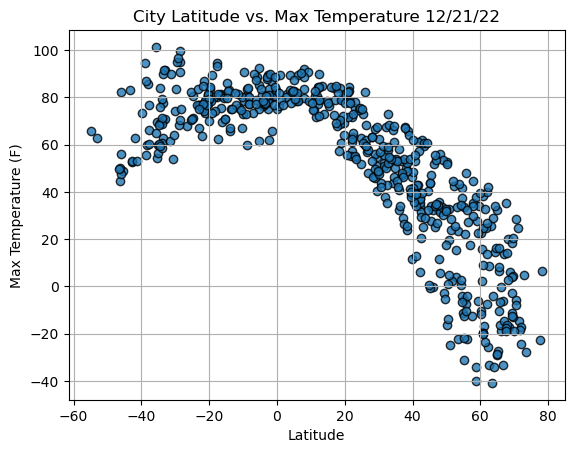

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

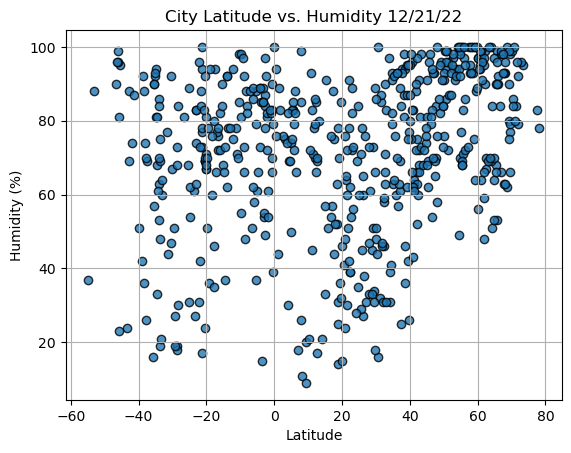

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

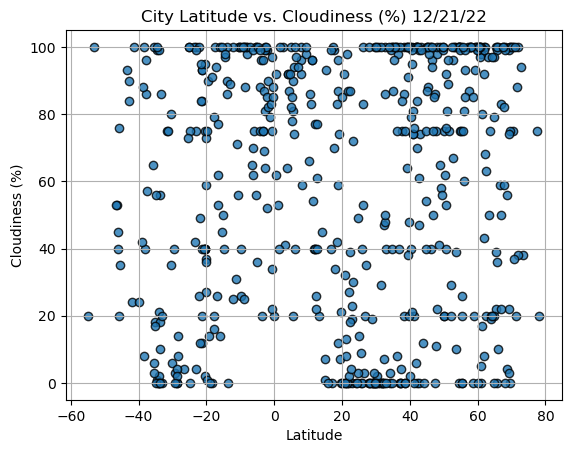

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

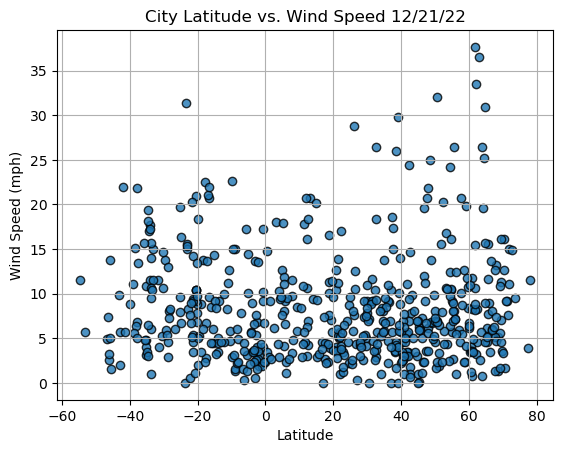

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-12-21 16:47:02
Lat                      -34.5322
Lng                       20.0403
Max Temp                    69.15
Humidity                       68
Cloudiness                      1
Wind Speed                  19.33
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
560    False
561    False
562     True
563     True
564    False
Name: Lat, Length: 565, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muslyumovo,RU,2022-12-21 16:46:58,55.3033,53.1947,-5.58,100,26,2.68
2,Jamestown,US,2022-12-21 16:42:14,42.0970,-79.2353,34.02,66,100,3.44
5,Terrace,CA,2022-12-21 16:44:49,54.5163,-128.6035,-4.09,49,0,24.16
9,Kapaa,US,2022-12-21 16:47:01,22.0752,-159.3190,71.58,91,0,5.75
12,Bathsheba,BB,2022-12-21 16:47:02,13.2167,-59.5167,84.81,80,20,20.71
...,...,...,...,...,...,...,...,...,...
556,Igarka,RU,2022-12-21 17:01:38,67.4667,86.5833,-19.03,98,100,6.22
557,Jhelum,PK,2022-12-21 16:58:29,32.9331,73.7264,54.54,31,0,4.32
558,Thinadhoo,MV,2022-12-21 17:01:39,0.5333,72.9333,81.70,76,92,14.81
562,Agadez,NE,2022-12-21 17:02:40,19.7500,10.2500,64.09,32,21,11.45


In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muslyumovo,RU,2022-12-21 16:46:58,55.3033,53.1947,-5.58,100,26,2.68
2,Jamestown,US,2022-12-21 16:42:14,42.0970,-79.2353,34.02,66,100,3.44
5,Terrace,CA,2022-12-21 16:44:49,54.5163,-128.6035,-4.09,49,0,24.16
9,Kapaa,US,2022-12-21 16:47:01,22.0752,-159.3190,71.58,91,0,5.75
12,Bathsheba,BB,2022-12-21 16:47:02,13.2167,-59.5167,84.81,80,20,20.71


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

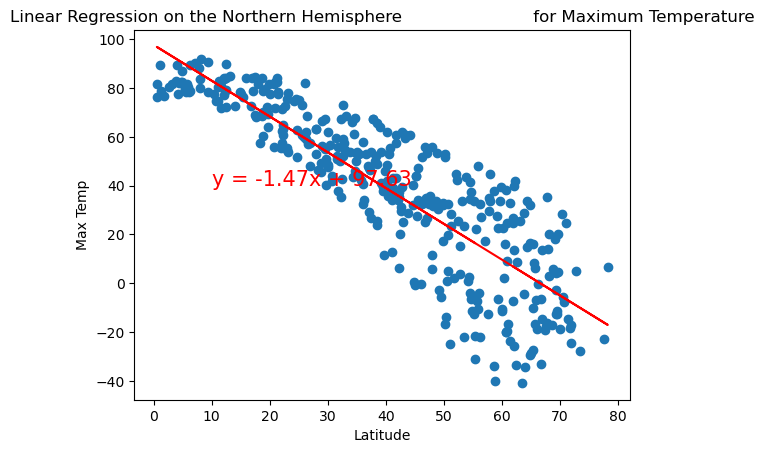

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

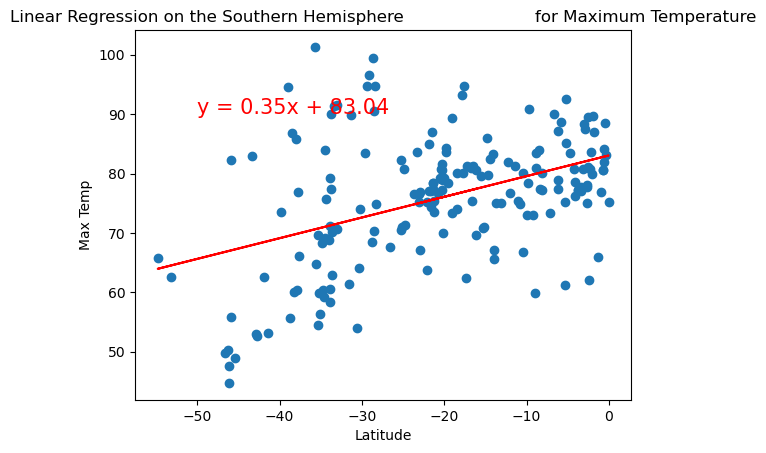

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

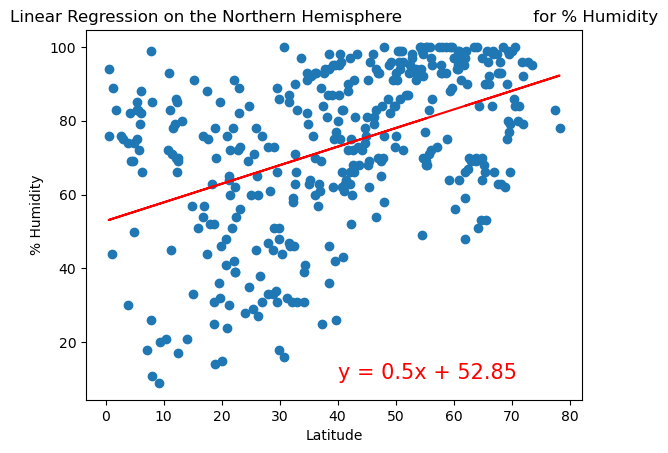

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

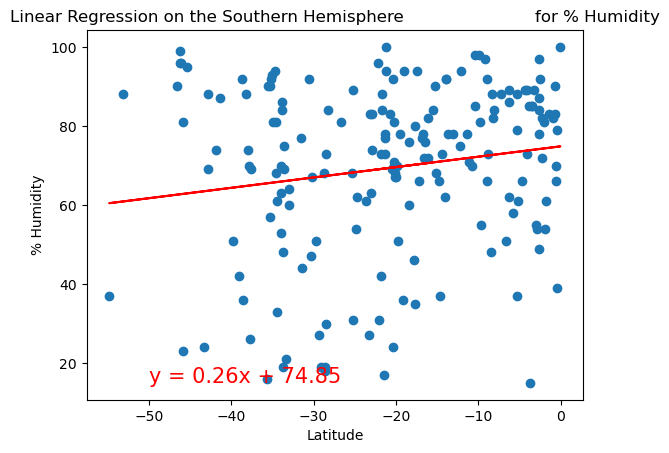

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

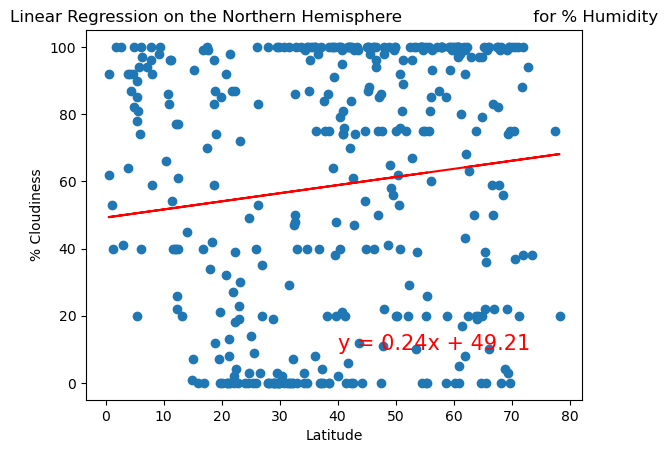

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(40,10))

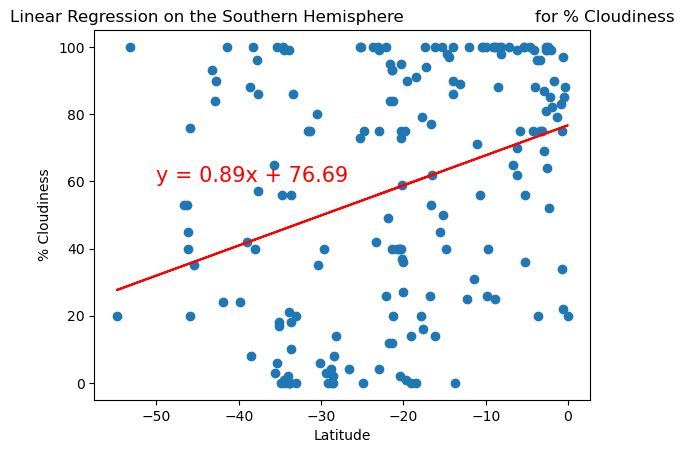

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

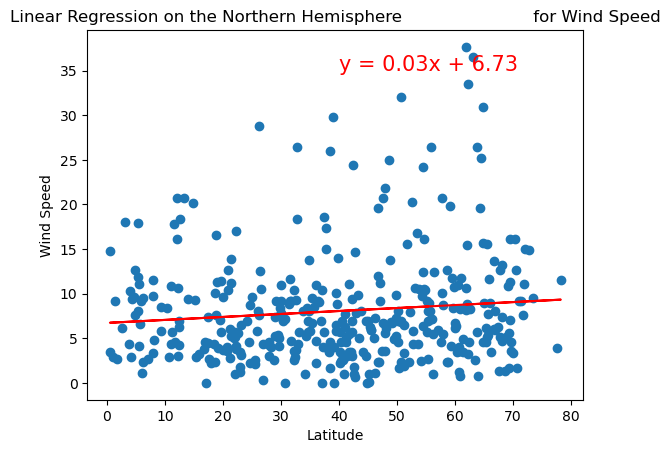

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

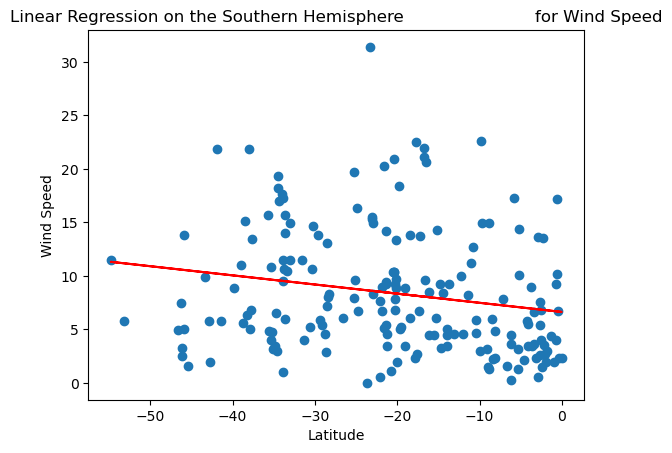

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))